In [63]:
import env
import utilities as utils
import wrangle as w

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style

In [2]:
sql = '''
        SELECT *
        FROM logs
        LEFT JOIN cohorts ON cohorts.id = logs.cohort_id;
      '''

In [3]:
url = utils.generate_db_url(env.user, env.password, env.host, 'curriculum_logs')

In [4]:
df = utils.generate_df('curriculum_logs.csv', query=sql, db_url=url, cached=True)

In [47]:
df.drop(columns=['id','slack','deleted_at'], inplace=True)

KeyError: "['id' 'slack' 'deleted_at'] not found in axis"

In [6]:
df.program_id.isnull().sum()

52893

In [7]:
df.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [8]:
df.start_date = pd.to_datetime(df.start_date, format='%Y-%m-%d')
df.end_date = pd.to_datetime(df.end_date, format='%Y-%m-%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  900223 non-null  int64         
 1   date        900223 non-null  object        
 2   time        900223 non-null  object        
 3   path        900222 non-null  object        
 4   user_id     900223 non-null  int64         
 5   cohort_id   847330 non-null  float64       
 6   ip          900223 non-null  object        
 7   name        847330 non-null  object        
 8   start_date  847330 non-null  datetime64[ns]
 9   end_date    847330 non-null  datetime64[ns]
 10  created_at  847330 non-null  object        
 11  updated_at  847330 non-null  object        
 12  program_id  847330 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 89.3+ MB


In [10]:
df.created_at = pd.to_datetime(df.created_at, unit='ns')
df.updated_at = pd.to_datetime(df.updated_at, unit='ns')

In [12]:
df['date'] = df['date']+ " " + df['time']

df.date = pd.to_datetime(df.date)

In [13]:
df = df.set_index(df.date).drop(columns=['Unnamed: 0', 'date', 'time'])

In [14]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [15]:
easley_df = df[df.name == 'Easley']

In [16]:
len(easley_df[easley_df.index.hour < 5])

150

In [17]:
easley_df[easley_df.user_id == 839].ip

date
2020-12-08 10:50:16    130.45.49.89
2020-12-08 10:59:10    130.45.49.89
2020-12-08 10:59:11    130.45.49.89
2020-12-08 10:59:11    130.45.49.89
2020-12-08 11:16:40    130.45.49.89
                           ...     
2020-12-14 11:58:14    130.45.49.89
2020-12-14 13:39:14    130.45.49.89
2020-12-14 14:25:22    130.45.49.89
2020-12-14 14:58:53    130.45.49.89
2020-12-14 15:50:48    130.45.49.89
Name: ip, Length: 92, dtype: object

In [18]:
len(easley_df.user_id.unique())

17

In [19]:
easley_df_counts = pd.DataFrame(data=easley_df.user_id.value_counts())

In [20]:
easley_df_counts = easley_df_counts.reset_index()

In [21]:
easley_df_counts.rename(columns={'index':'user_id', 'user_id':'num_logs'}, inplace=True)

<Figure size 1152x648 with 0 Axes>

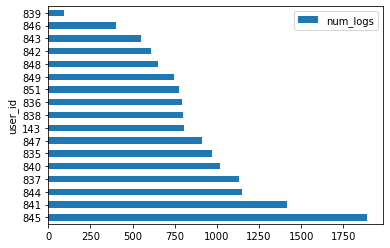

In [22]:
plt.figure(figsize=(16,9))

easley_df_counts.plot.barh(y='num_logs', x='user_id')

plt.show()

In [23]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [24]:
cohort_list = list(df.name.unique())
rows = []

for cohort in cohort_list:
    cohort_df = df[df.name == cohort]
    num = len(cohort_df[cohort_df.index.hour < 6])
    
    rows.append([cohort, num])
    sleep_df = pd.DataFrame(rows, columns=['cohort','number_of_logs'])

In [25]:
sleep_df.sort_values(by='number_of_logs',ascending=False)

,cohort,number_of_logs
32,Fortuna,1045
24,Staff,889
28,Ceres,875
40,Jupiter,864
34,Apex,800
37,Hyperion,729
1,Teddy,724
38,Darden,644
44,Marco,642
15,Ulysses,558


In [26]:
df.program_id.fillna(0, inplace=True)

In [27]:
df.program_id = df.program_id.astype(int)

In [28]:
prog_dummies = pd.get_dummies(df.program_id, drop_first=False)
prog_dummies.drop(columns=0, inplace=True)

In [29]:
prog_dummies.columns = ['php','java','ds','front']

In [31]:
df = pd.concat([df, prog_dummies], axis=1)

In [32]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,php,java,ds,front
date,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0,0,0
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0,0,0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0,0,0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,0,0,0
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,0,1,0,0


In [33]:
df.drop(columns=['created_at','updated_at'],inplace=True)

In [62]:
df.groupby('user_id')[['php','java','ds','front', 'accessed_after_end_date']].count()

,php,java,ds,front,accessed_after_end_date
user_id,,,,,
1,7404,7404,7404,7404,7404
2,1541,1541,1541,1541,1541
3,1562,1562,1562,1562,1562
4,692,692,692,692,692
5,1701,1701,1701,1701,1701
...,...,...,...,...,...
977,86,86,86,86,86
978,55,55,55,55,55
979,127,127,127,127,127


In [64]:
df = w.wrangle_logs()

In [65]:
df['logs_after_end_date'] = df.index > df.end_date

In [66]:
df['is_staff'] = (df.php + df.java + df.ds + df.front) == 0

In [67]:
df.is_staff.value_counts()

False    847330
True      52893
Name: is_staff, dtype: int64

In [68]:
df = df[df.is_staff == False]

In [88]:
from datetime import date

In [103]:
pd.Series(pd.date_range(start=df.end_date, end='2021-04-26'))

TypeError: Cannot convert input [date
2018-01-26 09:55:03   2016-02-06
2018-01-26 09:56:02   2016-02-06
2018-01-26 09:56:05   2016-02-06
2018-01-26 09:56:06   2016-02-06
2018-01-26 09:56:24   2018-05-17
                         ...    
2021-04-21 16:41:51   2014-02-04
2021-04-21 16:42:02   2014-02-04
2021-04-21 16:42:09   2014-02-04
2021-04-21 16:44:37   2014-02-04
2021-04-21 16:44:39   2014-02-04
Name: end_date, Length: 847330, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [106]:
df.groupby('user_id')[['logs_after_end_date']].count()

,logs_after_end_date
user_id,
1,7404
2,1541
3,1562
4,692
5,1701
...,...
977,86
978,55
979,127
